In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import missingno as msno

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [89]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [90]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
df_train.shape

(891, 12)

In [92]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
for col in df_train.columns :
    msg = 'column : {:>11}\t Count of NaN value : {:>3}\t Percent of NaN value : {:.2f}%'.format(col, df_train[col].isnull().sum(), 100*(df_train[col].isnull().sum()/df_train.shape[0]))
    print(msg)

column : PassengerId	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :    Survived	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Pclass	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Name	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Sex	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Age	 Count of NaN value : 177	 Percent of NaN value : 19.87%
column :       SibSp	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :       Parch	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Ticket	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Fare	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :       Cabin	 Count of NaN value : 687	 Percent of NaN value : 77.10%
column :    Embarked	 Count of NaN value :   2	 Percent of NaN value : 0.22%


In [95]:
for col in df_test.columns :
    msg = 'column : {:>11}\t Count of NaN value : {:>3}\t Percent of NaN value : {:.2f}%'.format(col, df_test[col].isnull().sum(), 100*(df_test[col].isnull().sum()/df_test.shape[0]))
    print(msg)

column : PassengerId	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Pclass	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Name	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Sex	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :         Age	 Count of NaN value :  86	 Percent of NaN value : 20.57%
column :       SibSp	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :       Parch	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :      Ticket	 Count of NaN value :   0	 Percent of NaN value : 0.00%
column :        Fare	 Count of NaN value :   1	 Percent of NaN value : 0.24%
column :       Cabin	 Count of NaN value : 327	 Percent of NaN value : 78.23%
column :    Embarked	 Count of NaN value :   0	 Percent of NaN value : 0.00%


<AxesSubplot:>

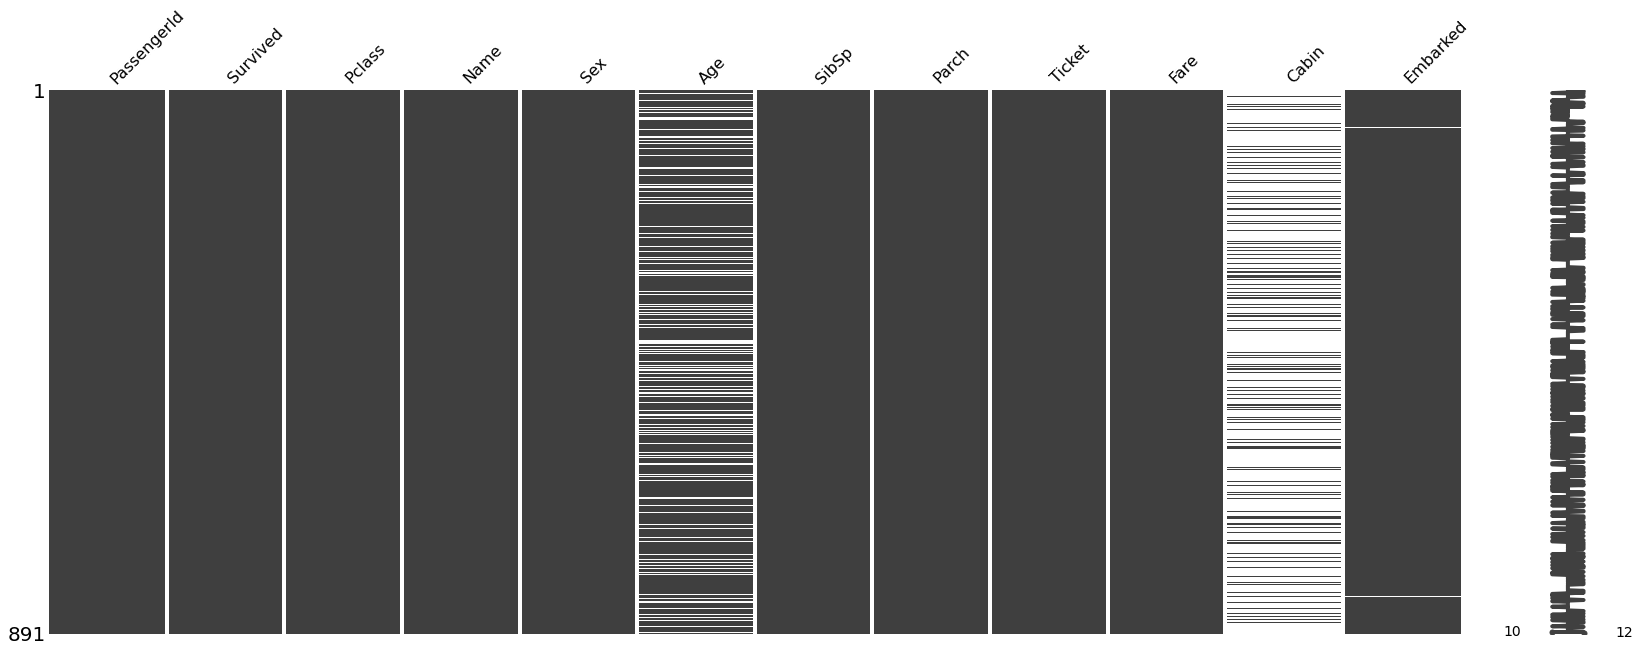

In [96]:
msno.matrix(df = df_train)

<AxesSubplot:>

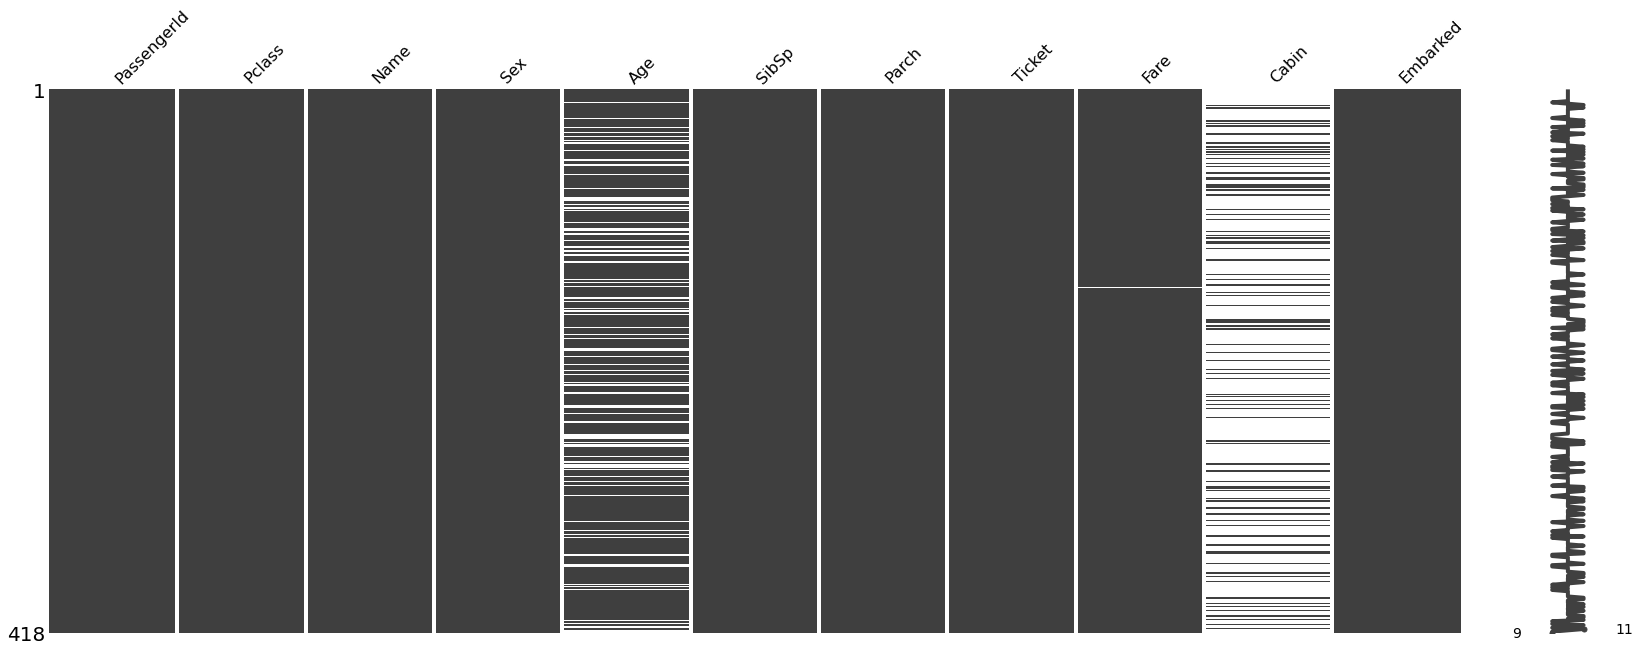

In [97]:
msno.matrix(df = df_test)

<AxesSubplot:>

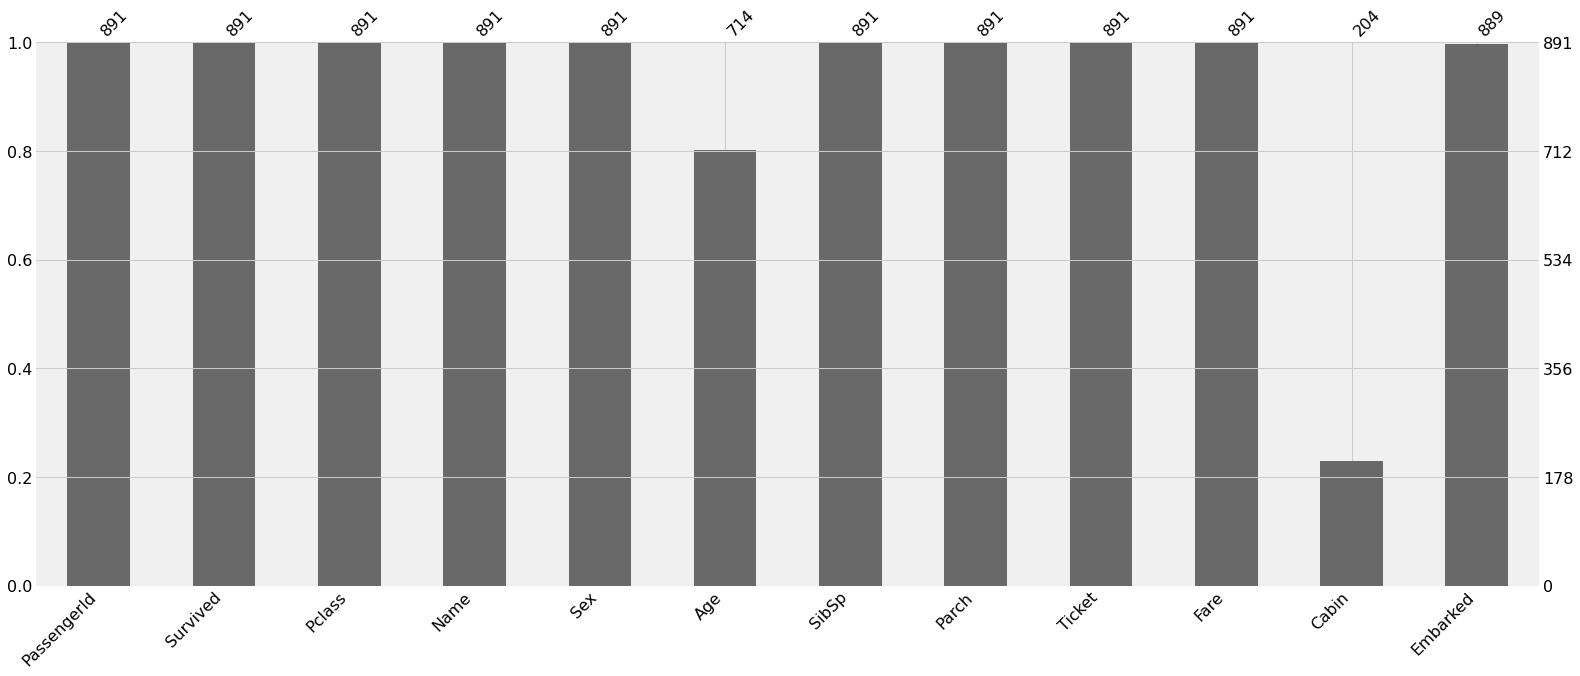

In [98]:
msno.bar(df = df_train)

<AxesSubplot:>

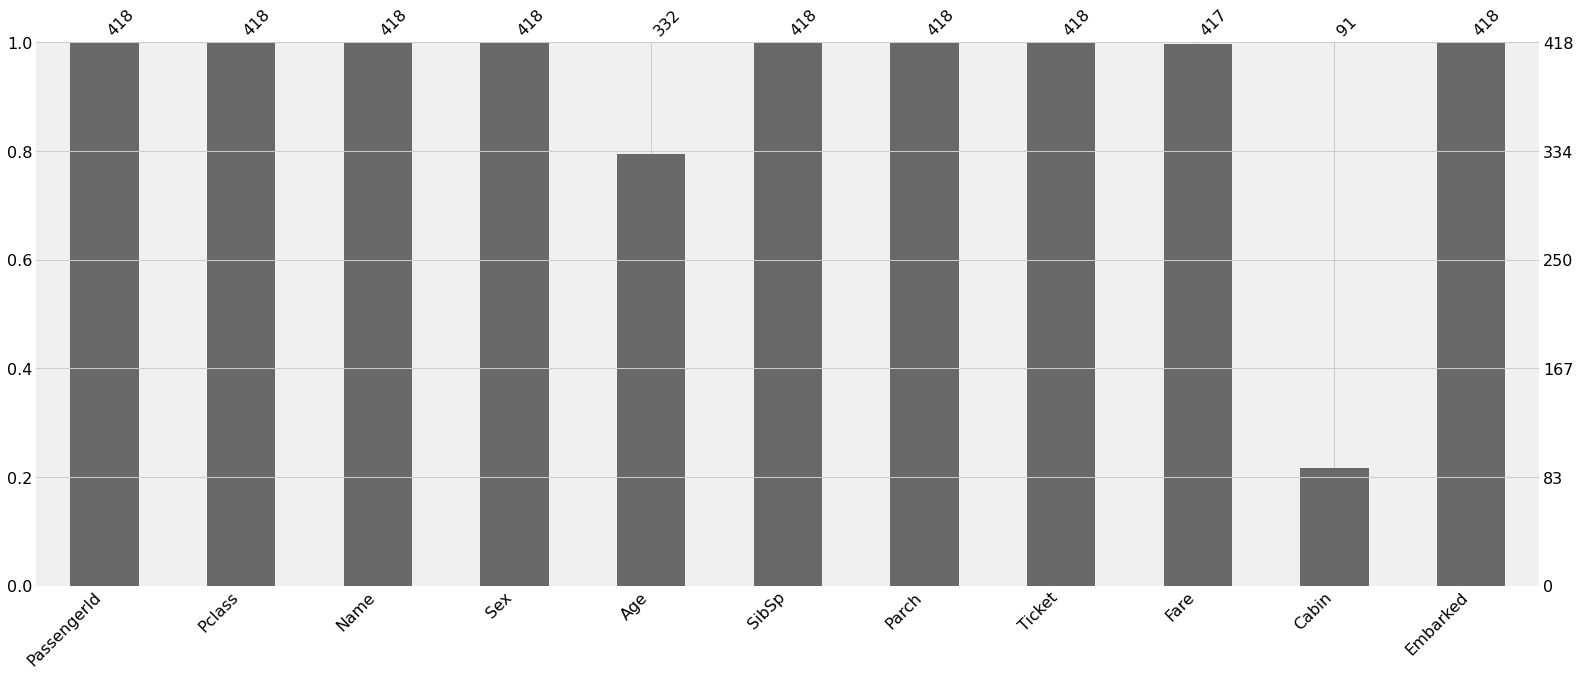

In [99]:
msno.bar(df = df_test)

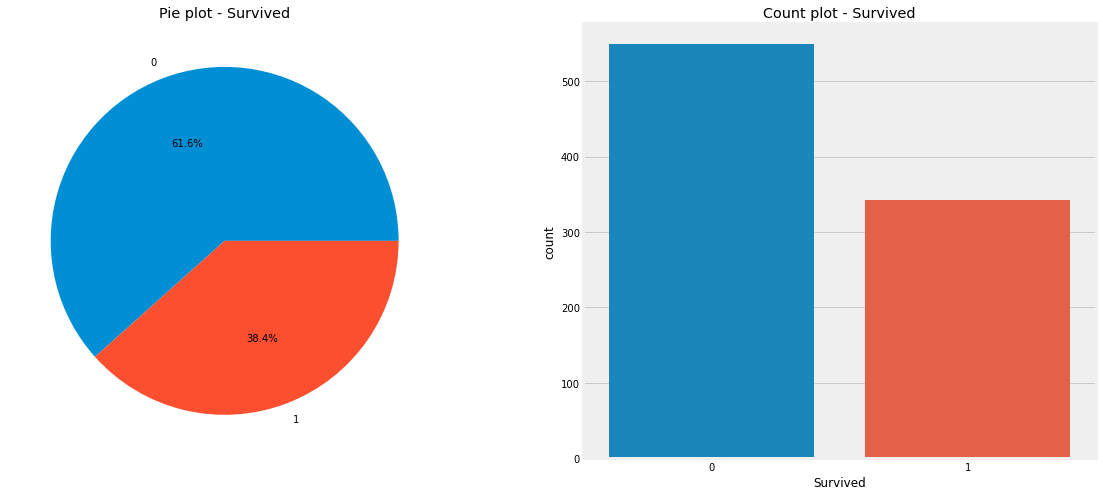

In [100]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

- imbalanced

#### Pclass

In [101]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [102]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


<AxesSubplot:xlabel='Pclass'>

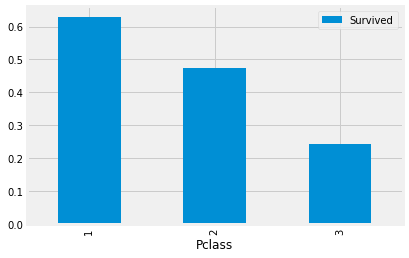

In [103]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

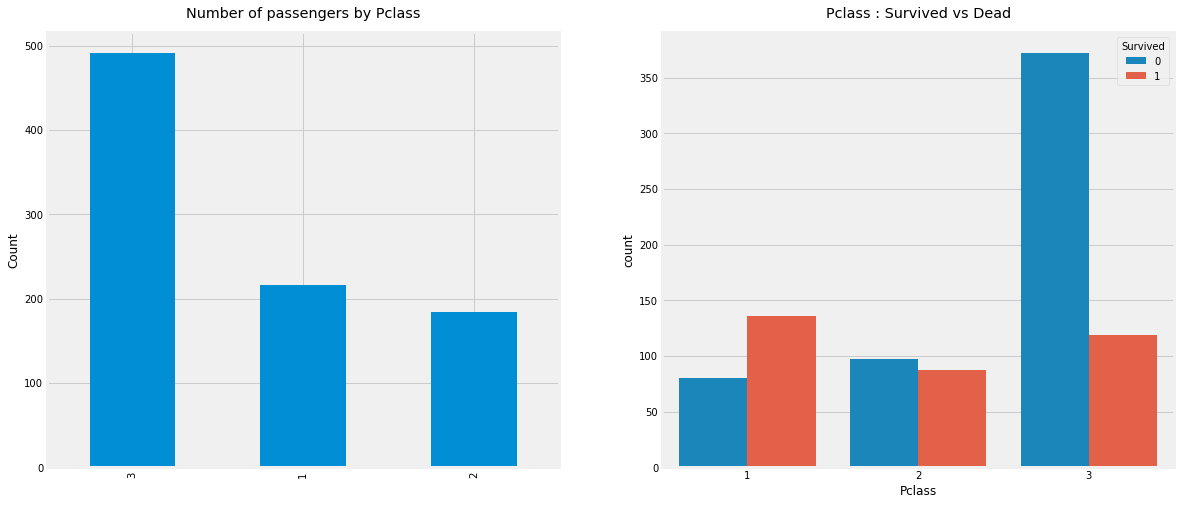

In [104]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
# sns.countplot('Pclass', data=df_train)
ax[0].set_title("Number of passengers by Pclass", y= y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Pclass : Survived vs Dead", y=y_position)
plt.show()

#### Sex

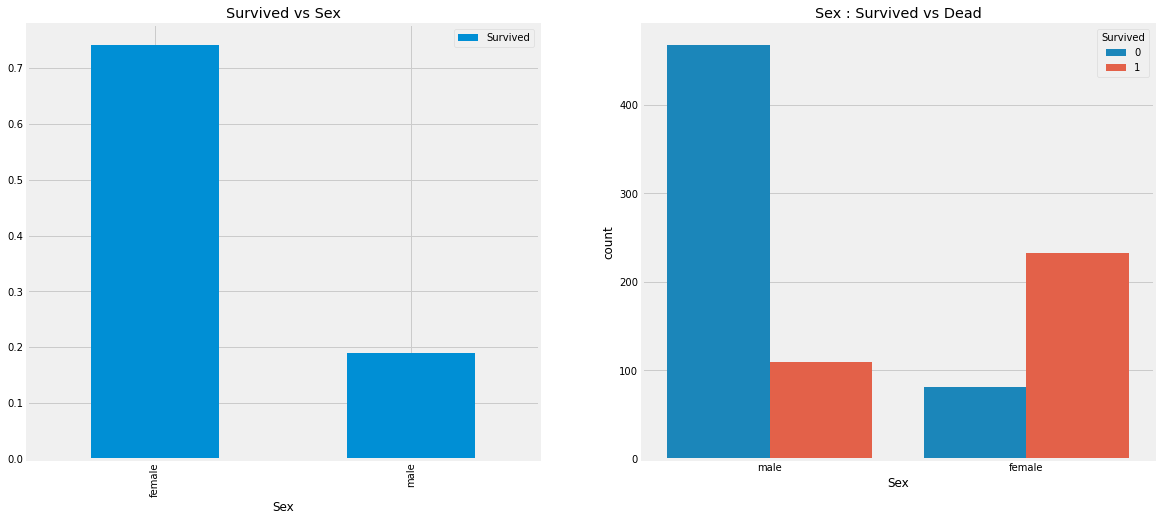

In [105]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

#### Sex & Pclass

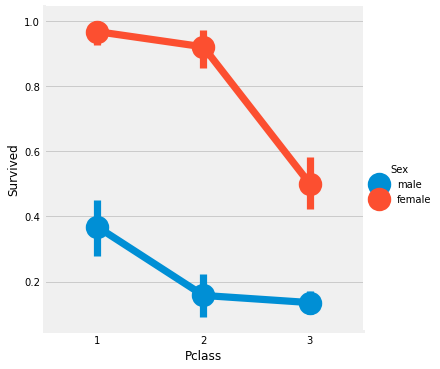

In [106]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

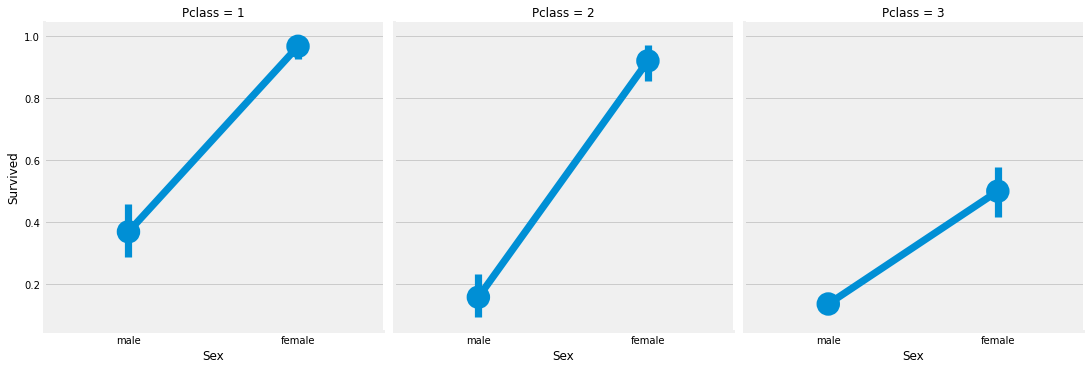

In [107]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train)

#### Age

In [108]:
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

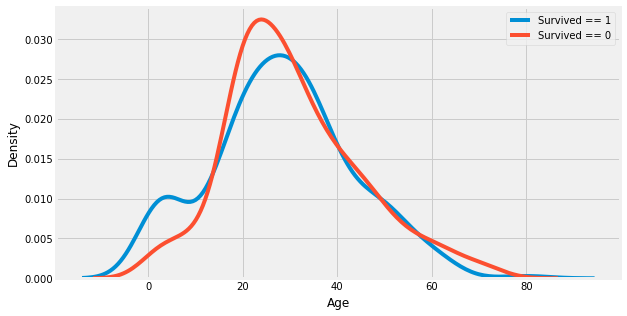

In [109]:
f, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

Text(0.5, 1.0, 'Age Distribution within classes')

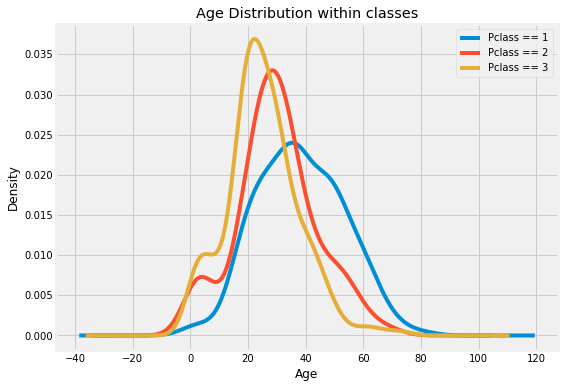

In [110]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')
plt.legend(['Pclass == 1', 'Pclass == 2', 'Pclass == 3'])

plt.xlabel('Age')
plt.title('Age Distribution within classes')

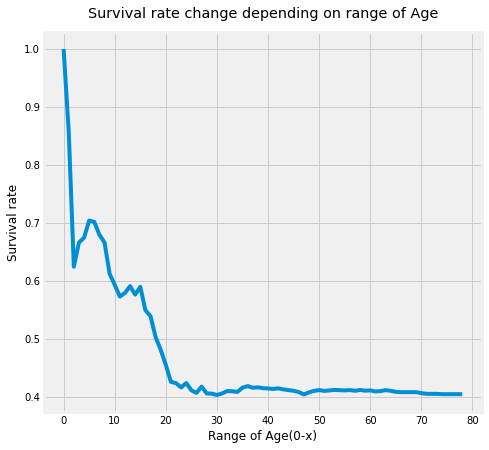

In [111]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

#### Pclass, Age, Sex

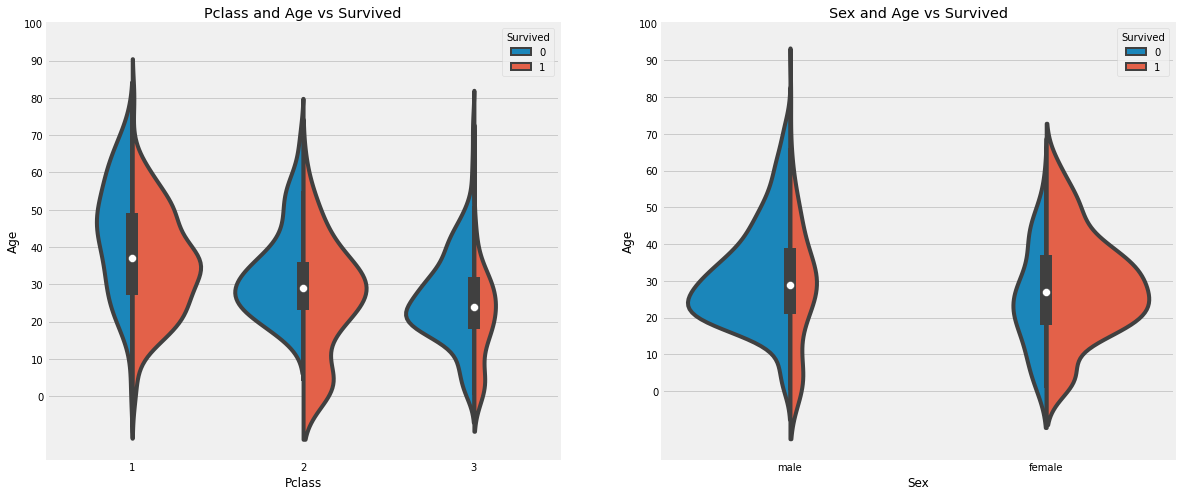

In [112]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Embarked

<AxesSubplot:xlabel='Embarked'>

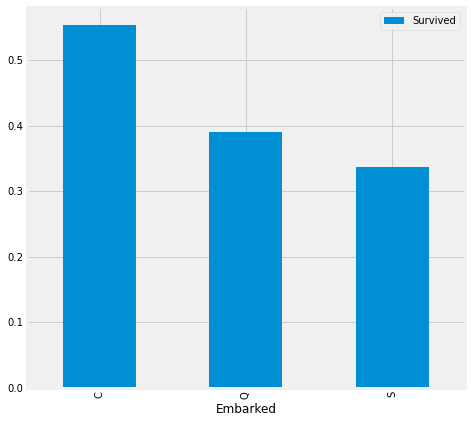

In [113]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax)

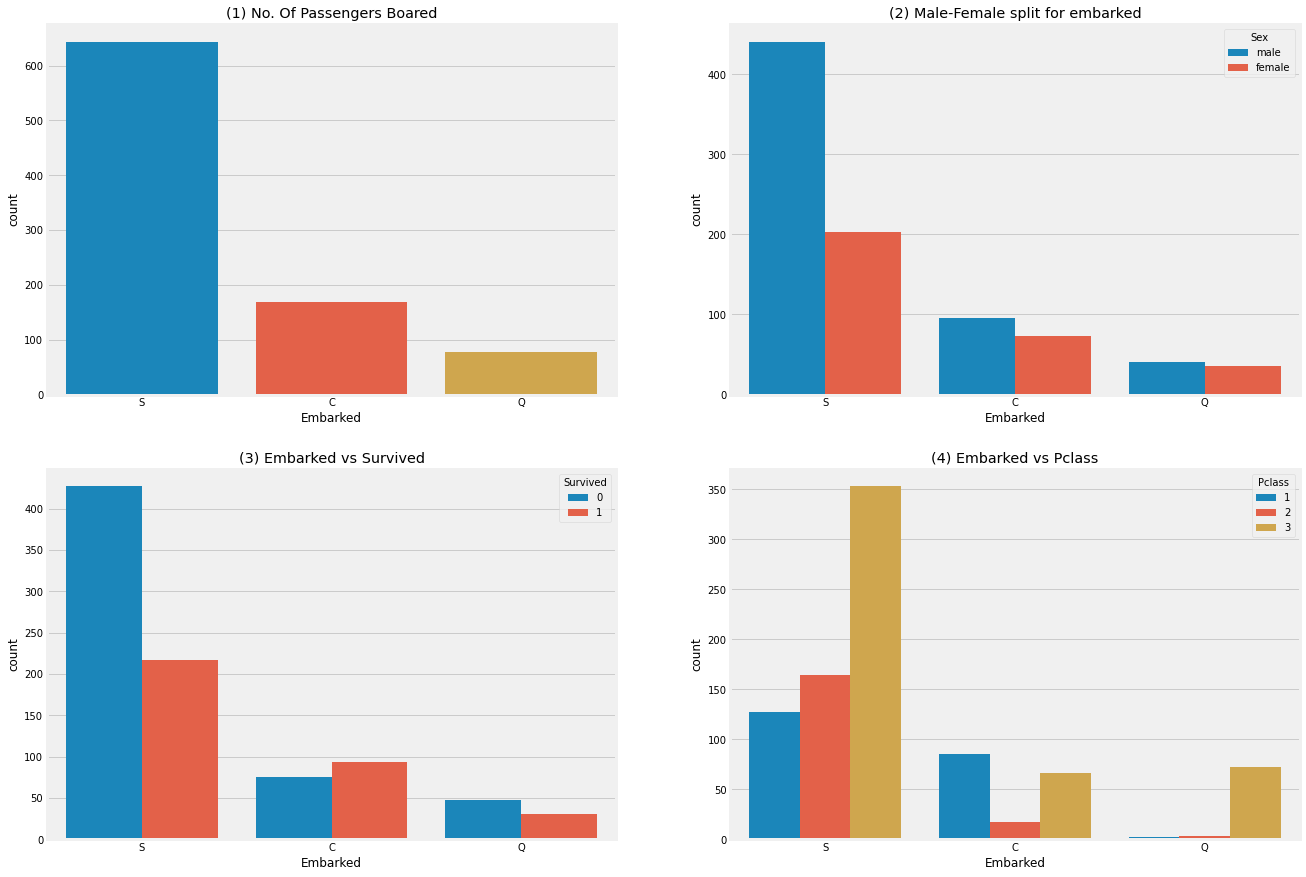

In [114]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.show()

#### Family = Sibsp  + Parch

In [115]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 #자신 포함

In [116]:
df_train.FamilySize.describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

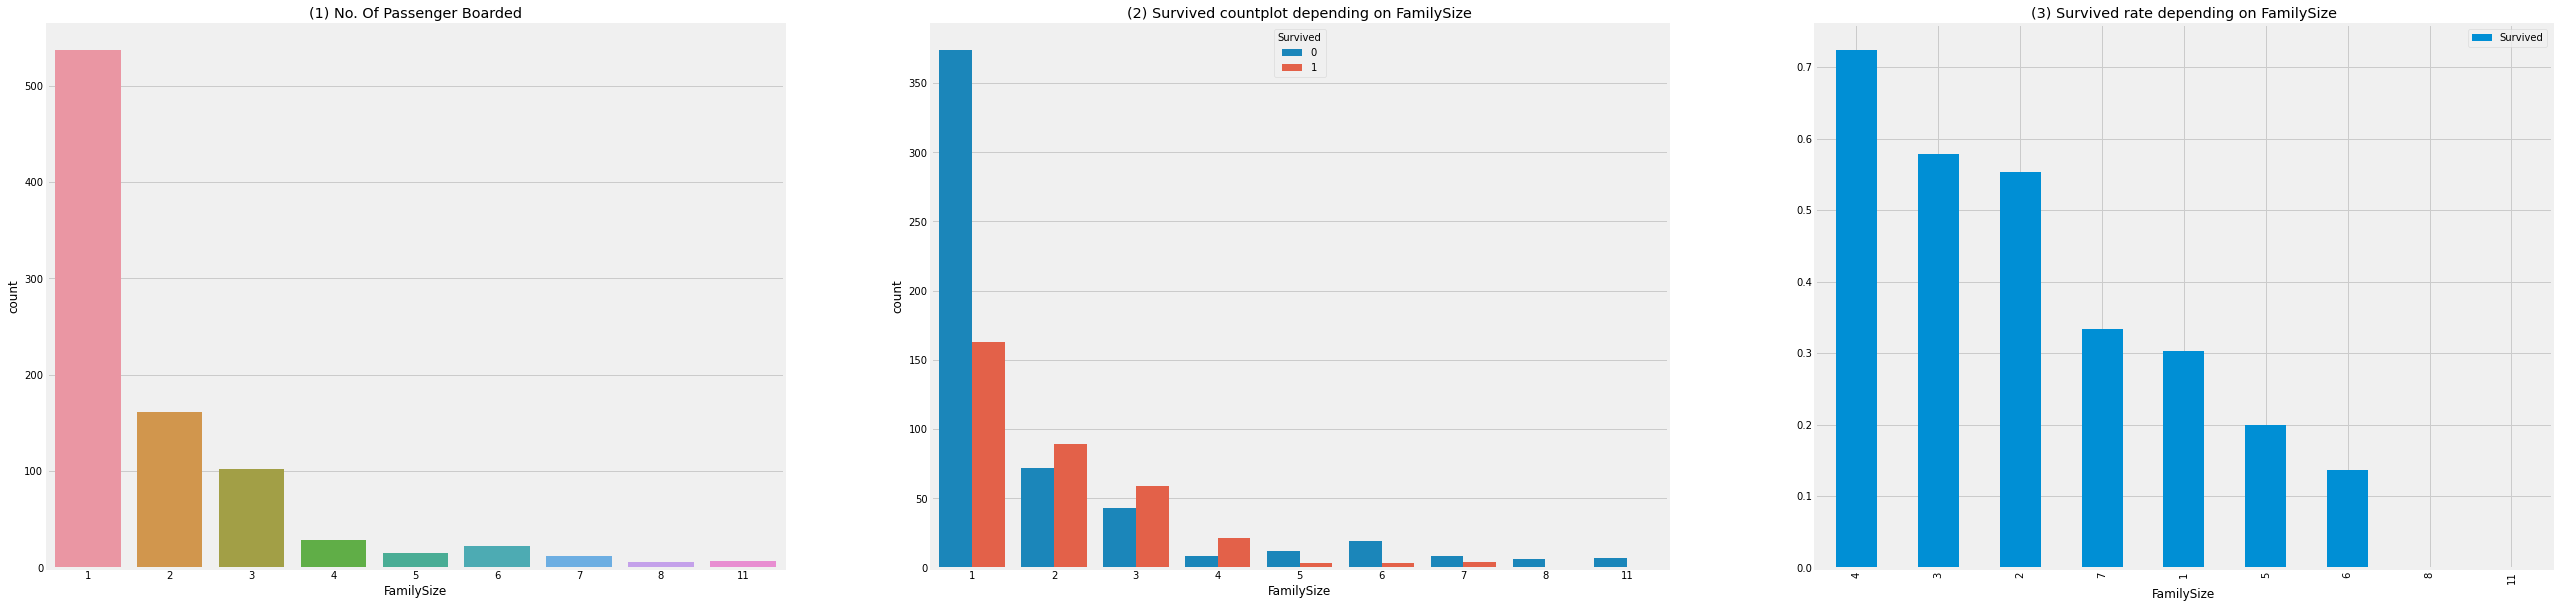

In [117]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize')

plt.show()

#### Fare

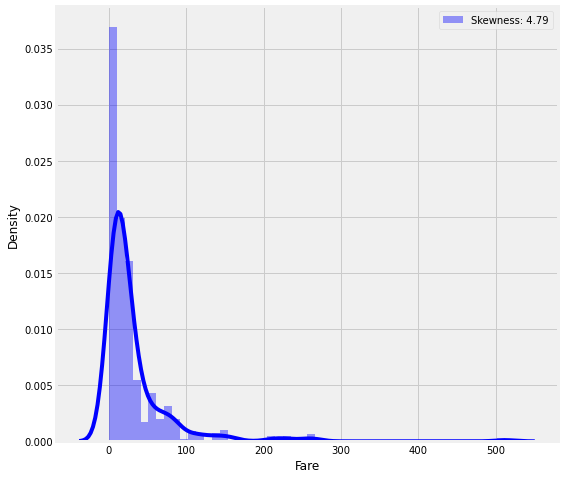

In [118]:
f, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [119]:
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)

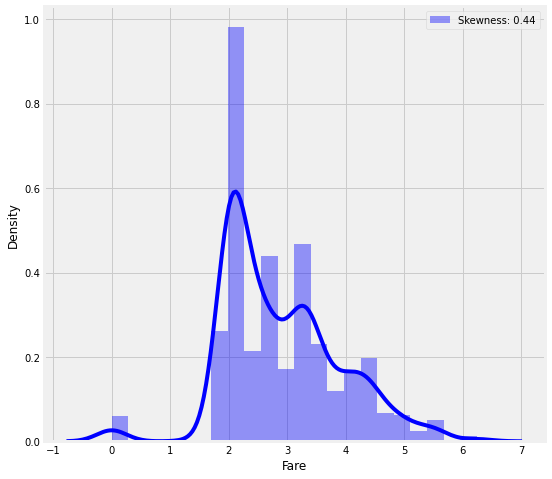

In [120]:
f, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### cabin
- null이 많아서 제외

#### Ticket

In [121]:
df_train['Ticket'].value_counts()

CA. 2343     7
347082       7
1601         7
3101295      6
CA 2144      6
            ..
239854       1
PC 17601     1
112059       1
349219       1
A/4 45380    1
Name: Ticket, Length: 681, dtype: int64

### Feature engineering
#### null

In [122]:
df_train['Age'].isnull().sum()

177

In [123]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [124]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [125]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [126]:
pd.crosstab(df_train['Initial'], df_train['Sex']).style.background_gradient(cmap='summer_r')

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [127]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], 
                           inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], 
                           inplace=True)

In [128]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

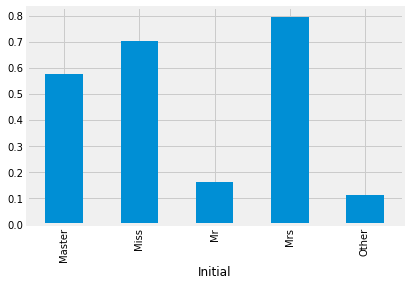

In [129]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [130]:
df_all = pd.concat([df_train, df_test])
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,1,Mr


In [131]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,1,Mr


In [132]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.384615


In [133]:
df_train.loc[(df_train['Age'].isnull()) & (df_train["Initial"] == 'Mr'), 'Age'] = 32.556397
df_train.loc[(df_train['Age'].isnull()) & (df_train["Initial"] == 'Master'), 'Age'] = 5.482642
df_train.loc[(df_train['Age'].isnull()) & (df_train["Initial"] == 'Miss'), 'Age'] = 21.834533
df_train.loc[(df_train['Age'].isnull()) & (df_train["Initial"] == 'Mrs'), 'Age'] = 37.034884
df_train.loc[(df_train['Age'].isnull()) & (df_train["Initial"] == 'Other'), 'Age'] = 44.923077

In [134]:
df_test.loc[(df_train['Age'].isnull()) & (df_test["Initial"] == 'Mr'), 'Age'] = 32.556397
df_test.loc[(df_train['Age'].isnull()) & (df_test["Initial"] == 'Master'), 'Age'] = 5.482642
df_test.loc[(df_train['Age'].isnull()) & (df_test["Initial"] == 'Miss'), 'Age'] = 21.834533
df_test.loc[(df_train['Age'].isnull()) & (df_test["Initial"] == 'Mrs'), 'Age'] = 37.034884
df_test.loc[(df_train['Age'].isnull()) & (df_test["Initial"] == 'Other'), 'Age'] = 44.923077

In [135]:
df_train['Embarked'].isnull().sum()

2

In [136]:
df_train['Embarked'].fillna('S', inplace=True)

In [137]:
df_train['Embarked'].isnull().sum()

0

In [138]:
df_train['Age_cat'] = 0

In [139]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [140]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(df_train['Age'] >=10) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(df_train['Age'] >=20) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(df_train['Age'] >=30) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(df_train['Age'] >=40) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(df_train['Age'] >=50) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(df_train['Age'] >=60) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[df_train['Age'] >=70, 'Age_cat'] = 7

In [141]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [142]:
def category_age(x) :
    if x< 10 :
        return 0
    elif x < 20 :
        return 1
    elif x<30 :
        return 2
    elif x<40 :
        return 3
    elif x<50 :
        return 4
    elif x<60:
        return 5
    elif x<70 :
        return 6
    else:
        return 7

In [143]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [144]:
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [145]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3,3


In [146]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)

In [147]:
df_test.drop(['Age'], axis=1, inplace=True)

In [148]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [149]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [150]:
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [151]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [152]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [153]:
df_train.Embarked.isnull().sum()

0

In [154]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [155]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

In [156]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

<AxesSubplot:title={'center':'Pearson Correalation of Reatures'}>

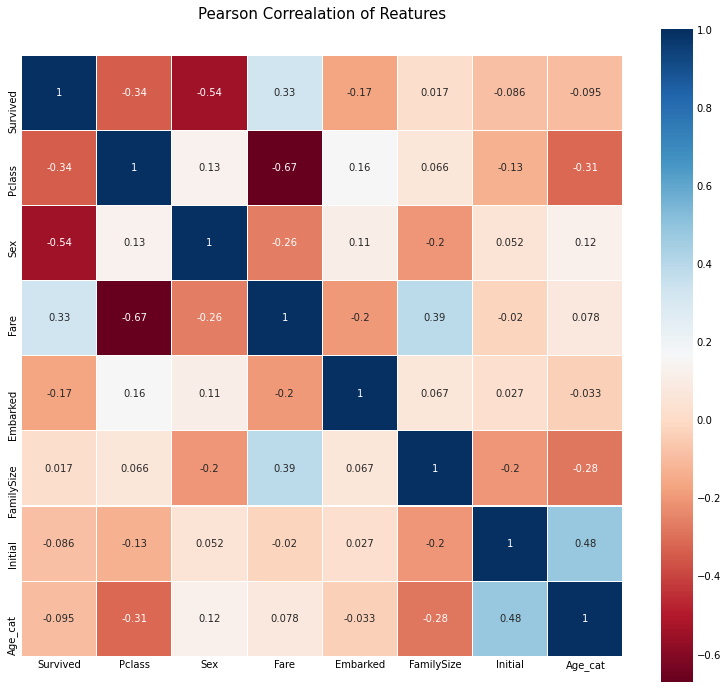

In [157]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correalation of Reatures', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [158]:
df_train = pd.get_dummies(df_train ,columns=['Initial'], prefix="Initial")
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [159]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [160]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix="Embarked")
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [161]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [162]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [183]:
df_test.isnull().sum()

Pclass        0
Sex           0
Fare          1
FamilySize    0
Age_cat       0
Initial_0     0
Initial_1     0
Initial_2     0
Initial_3     0
Initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

In [184]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [186]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [187]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=4444)

In [188]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [189]:
prediction = model.predict(X_vid)

In [190]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [191]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vid.shape[0], 100*metrics.accuracy_score(prediction, y_vid)))

총 268명 중 79.10% 정확도로 생존 맞춤


In [192]:
model.feature_importances_

array([0.09372805, 0.11095424, 0.29406069, 0.08778802, 0.10990597,
       0.00607776, 0.04989529, 0.15456805, 0.04927947, 0.00493075,
       0.01137613, 0.00881897, 0.0186166 ])

In [193]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_test.columns)

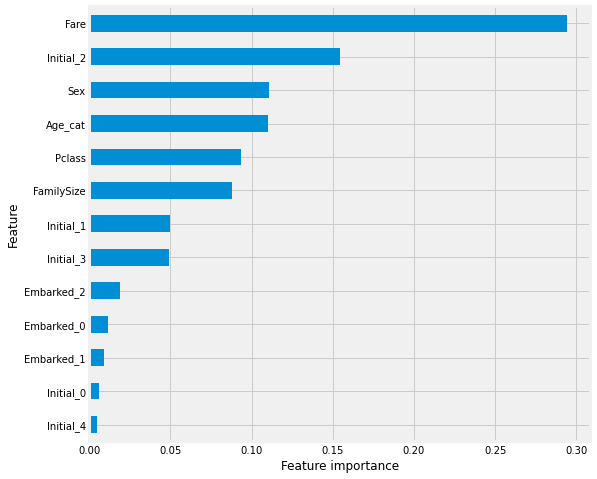

In [194]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [195]:
submission = pd.read_csv('./gender_submission.csv')

In [196]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [197]:
prediction = model.predict(X_test)

In [199]:
submission['Survived'] = prediction

In [201]:
submission.to_csv("./submission_v1.csv", index=False)